# Minimizing_Churn_Rate_Through_Analysis_of_Financial_Habits

- Subscription product are the main source of revenue for companies across all industries.
- These product can come in the form of a one size fit all overcompassing subscription or, in multi-level membership.
- our main aim is to minimize the customer churn(a.k.a. subscription cancelliation)
- we can analyse the dataset and find the target customer whose chance of subscription cancellation.so, company can offer some     other offer's so, the continue their subscription.

## Importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('F:\\PROJECT\\5. Minimizing Churn Rate Through Analysis of Financial Habits\\churn_data.csv')

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
#checking any column is nan value
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [5]:
dataset = dataset[pd.notnull(dataset['age'])]

In [6]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [7]:
#droping the credit score and reward earned column
dataset = dataset.drop(columns= ['credit_score', 'rewards_earned'])

In [8]:
dataset.shape

(26996, 29)

In [9]:
dataset2 = dataset.drop(columns = ['user', 'churn'])

## Visualise the dataset

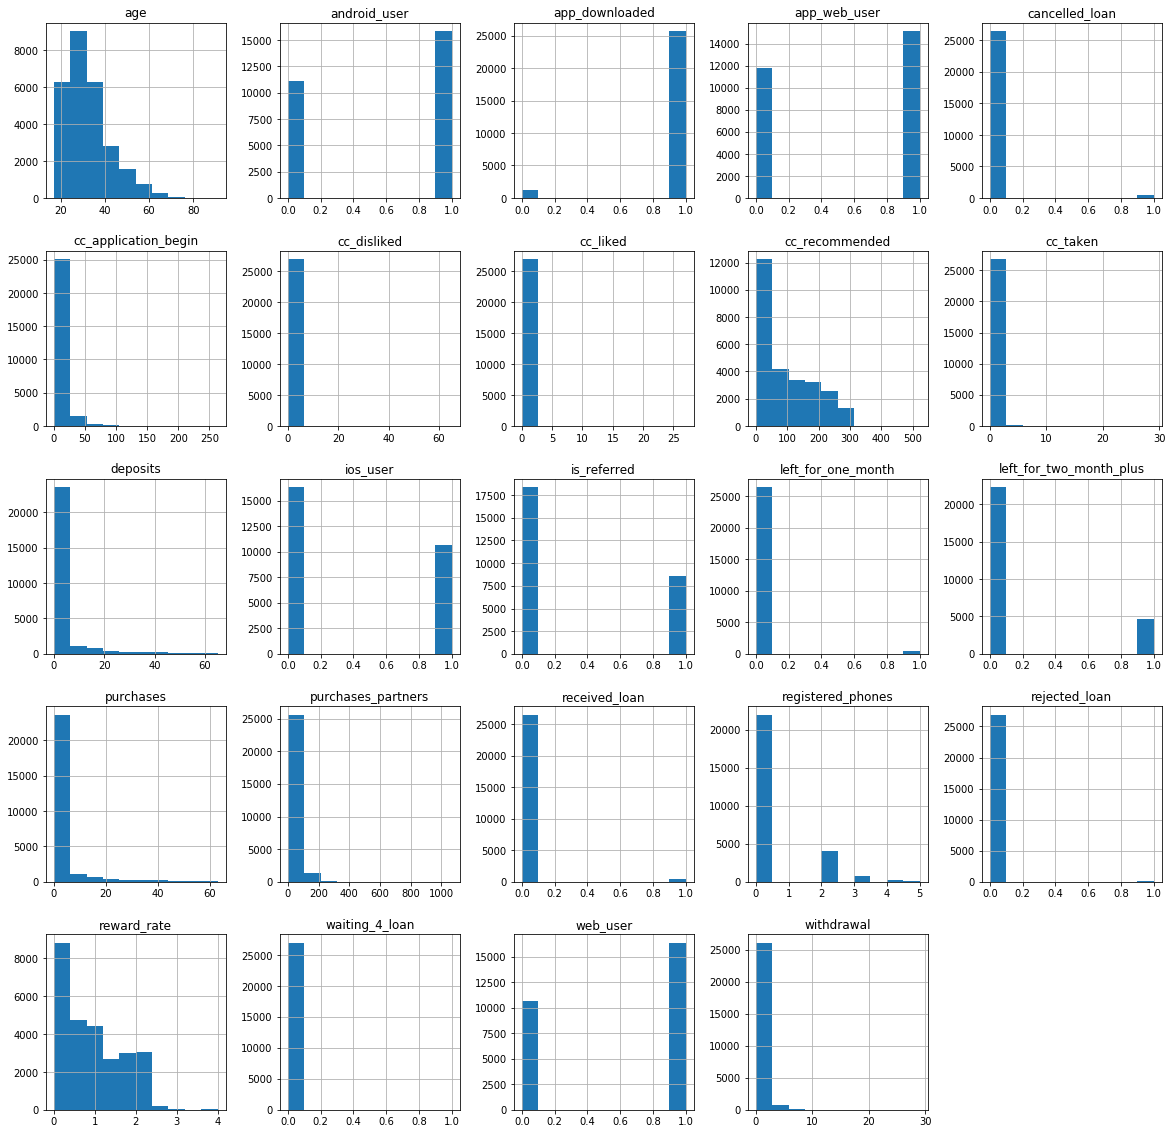

In [10]:
#visualise the dataset with histogram
dataset2.hist(figsize = (20, 20))
plt.show()

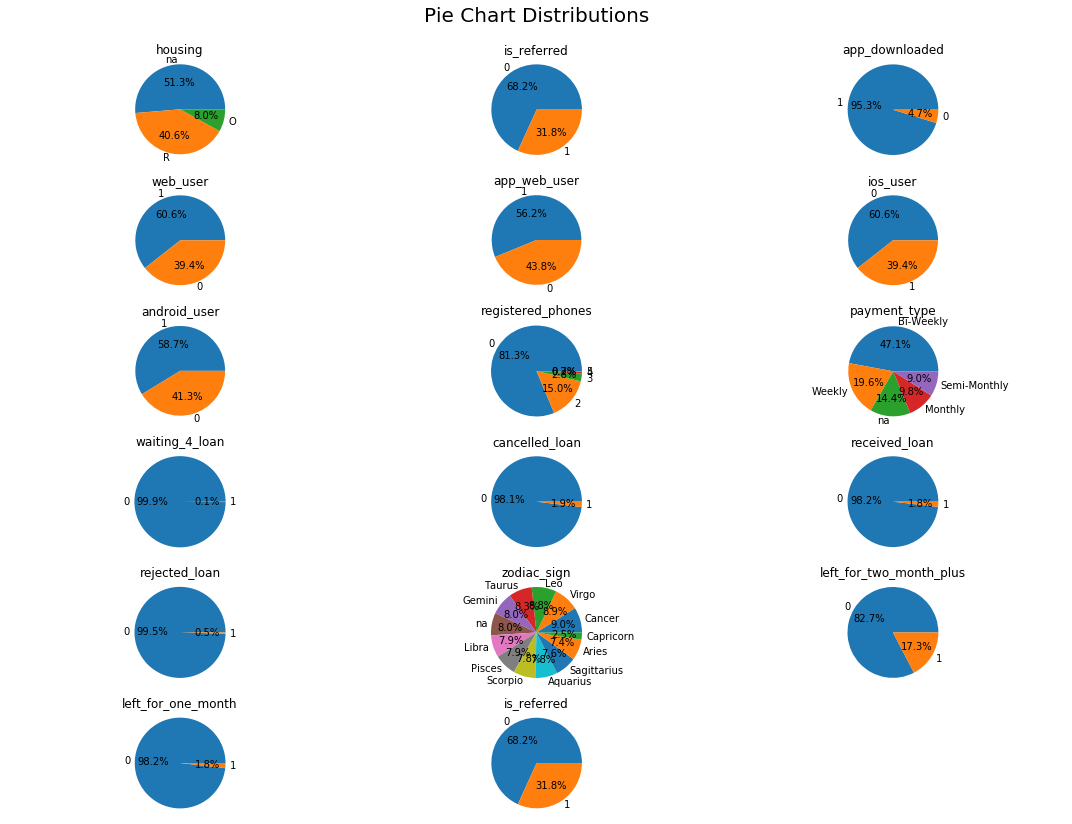

In [11]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

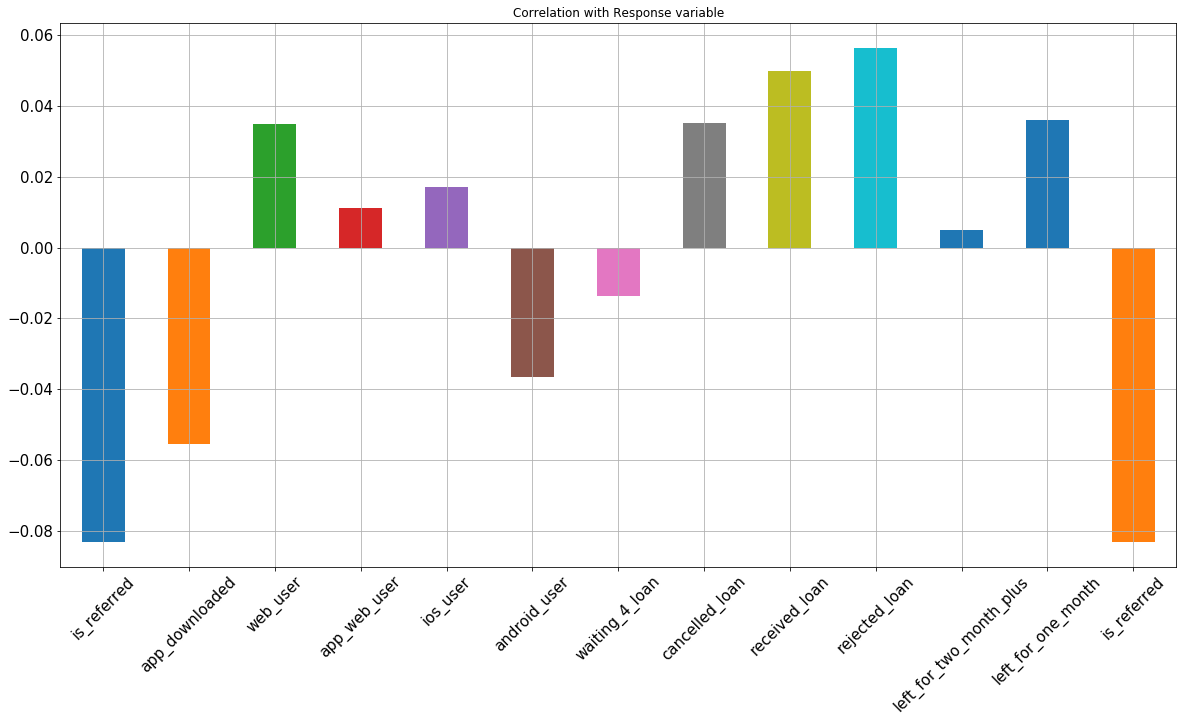

In [12]:
#visualise the dataset
dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

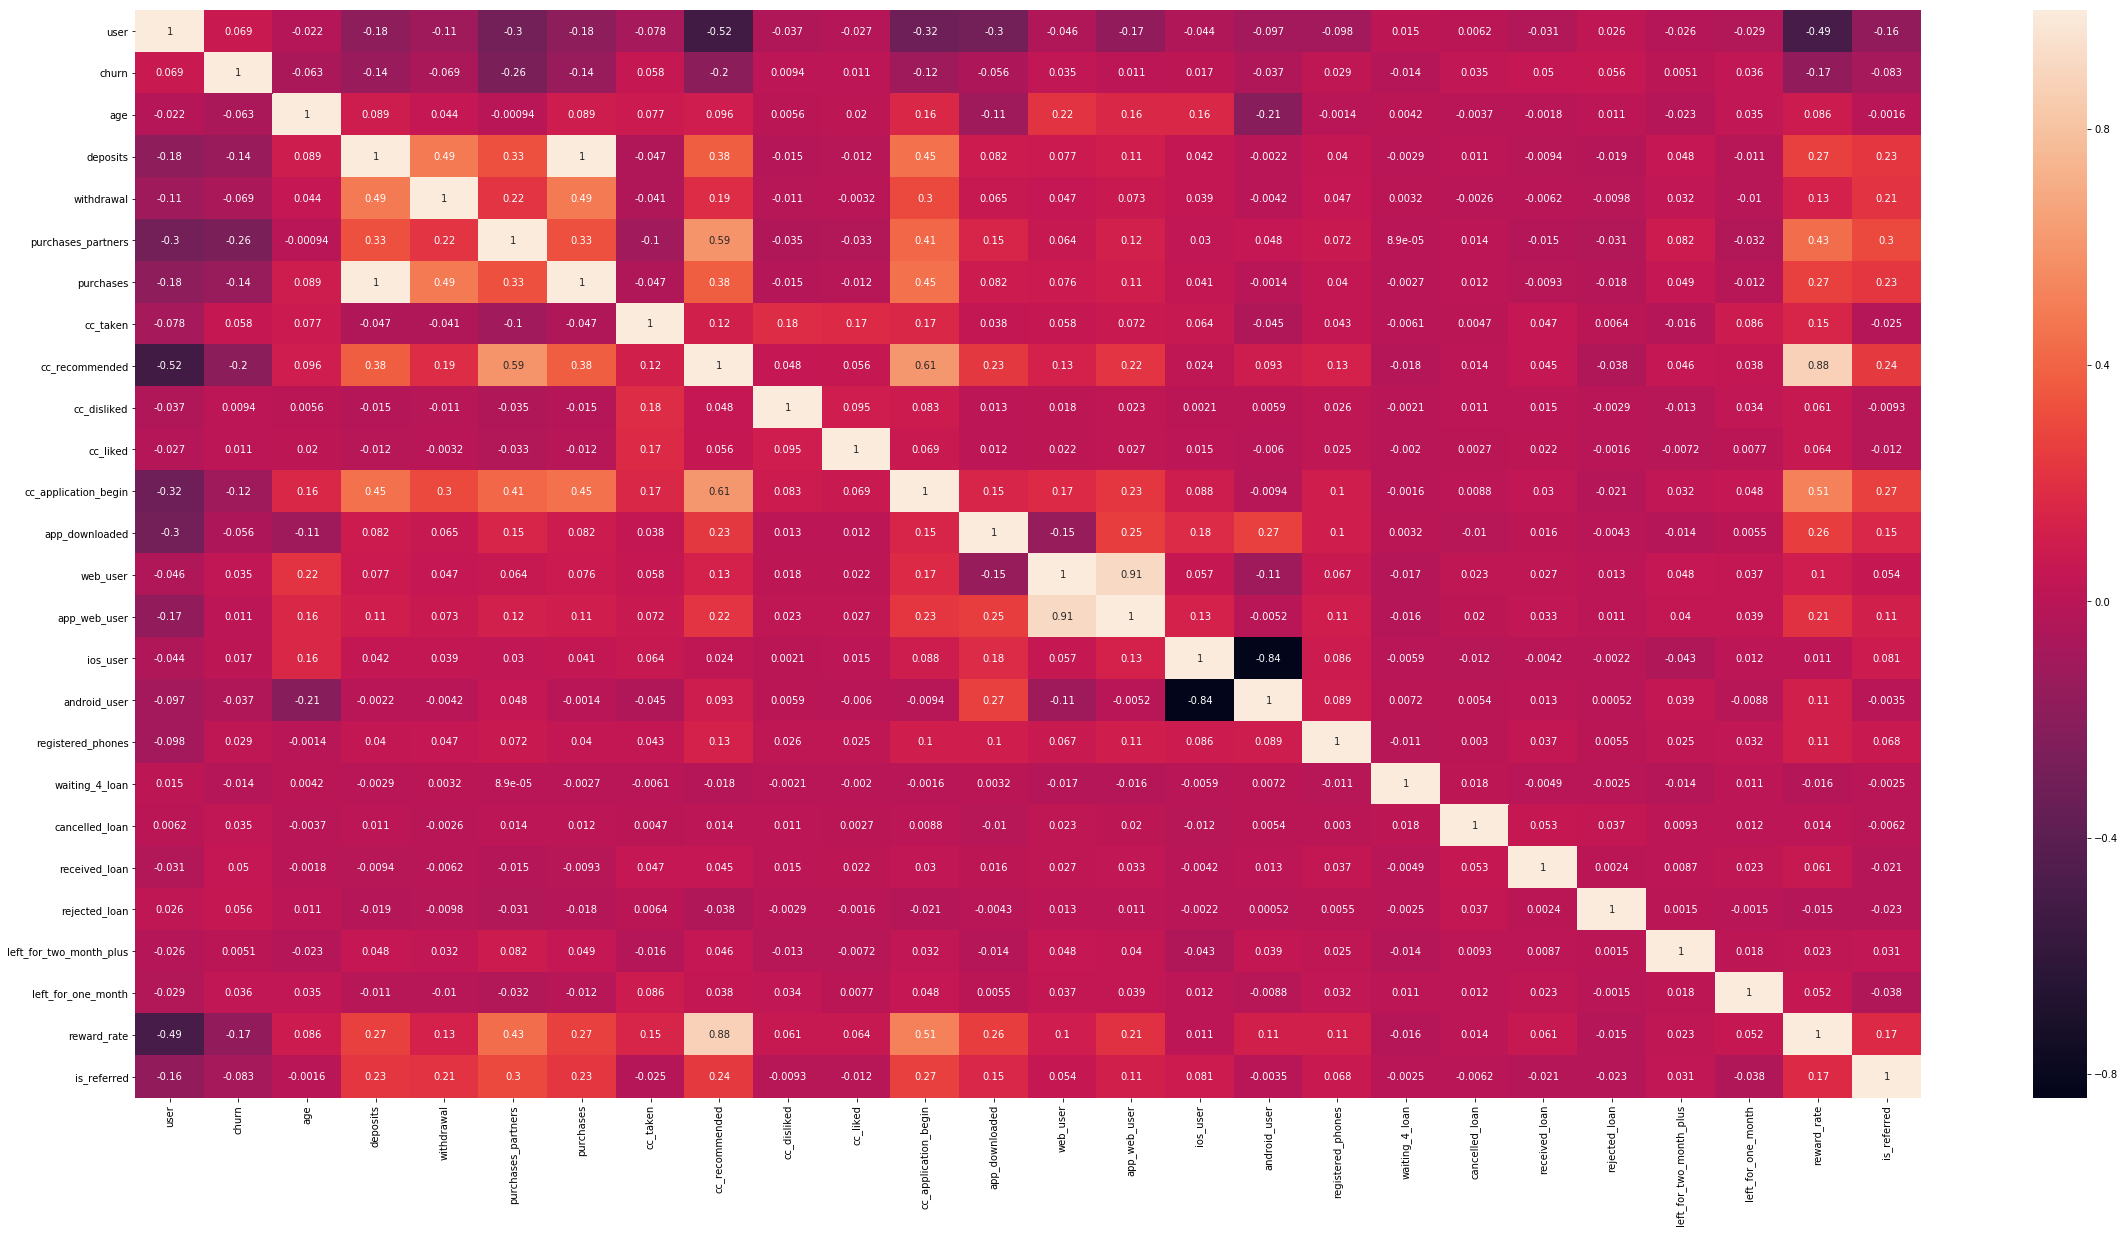

In [13]:
#visualise the correlation
plt.figure(figsize=(40,20)) 
sns.heatmap(dataset.corr(), annot=True) 

In [14]:
dataset = dataset.drop(columns = ['app_web_user'])

In [15]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


#### Writing the processed dataset back

In [16]:
dataset.to_csv('Final_churn_dataset.csv', index = False)

## Loading the final dataset 

In [17]:
dataset = pd.read_csv('Final_churn_dataset.csv')

In [18]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [19]:
#Droping the user id 
user_id  = dataset['user']
dataset = dataset.drop(columns= ['user'])

In [20]:
dataset

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37.0,na,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,0,28.0,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35.0,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26.0,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,1,27.0,na,0,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
5,1,32.0,R,5,3,111,5,0,227,0,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
6,0,21.0,na,0,0,4,0,0,0,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,0.07,0
7,0,24.0,na,0,0,2,0,0,0,0,...,na,0,0,0,0,Leo,0,0,0.11,0
8,0,28.0,R,0,0,0,0,2,47,1,...,Bi-Weekly,0,0,0,0,Sagittarius,0,0,0.87,1
9,0,23.0,na,1,0,87,1,0,125,0,...,Bi-Weekly,0,0,0,0,Aquarius,0,0,1.07,0


In [21]:
user_id

0        55409
1        23547
2        58313
3         8095
4        61353
5         3120
6        41406
7        67679
8        21269
9        25788
10       13840
11       25899
12       20839
13       13019
14       24387
15       65427
16       30419
17       30693
18       69531
19       34733
20       66712
21       15359
22       25997
23       13813
24       67807
25       19184
26       34210
27       57598
28       57608
29        8381
         ...  
26966    12588
26967    67090
26968    53666
26969    31403
26970    47206
26971    63394
26972    28036
26973    15756
26974    22955
26975    65004
26976    67182
26977     4109
26978    52358
26979    68179
26980    57660
26981    19540
26982    22377
26983    47156
26984    39792
26985    24442
26986    32870
26987    49367
26988    65830
26989    41813
26990    49903
26991    24291
26992     4116
26993    23740
26994    47663
26995    52752
Name: user, Length: 26996, dtype: int64

## Preprocess the final dataset

In [22]:
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [23]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [24]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [25]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [26]:
dataset

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,0,37.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,28.0,0,0,1,0,0,96,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,35.0,47,2,86,47,0,285,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,26.0,26,3,38,25,0,74,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,27.0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,32.0,5,3,111,5,0,227,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,21.0,0,0,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,24.0,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,28.0,0,0,0,0,2,47,1,0,...,0,0,0,0,0,0,1,0,0,0
9,0,23.0,1,0,87,1,0,125,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
Y = dataset['churn']
X = dataset.drop(columns= ['churn'])

## Spliting the dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 12345)

In [29]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
18759,36.0,0,0,25,0,0,45,0,0,3,...,0,0,0,0,0,0,0,0,0,0
20818,22.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17123,26.0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8944,27.0,27,1,57,27,0,109,0,0,11,...,1,0,0,0,0,0,0,0,0,0
18131,19.0,0,0,16,0,0,26,0,0,2,...,0,0,0,0,0,0,0,0,0,1
19909,26.0,1,1,19,1,0,28,0,0,5,...,0,0,0,0,0,0,0,0,0,0
15627,35.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8215,24.0,0,0,1,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24549,34.0,0,0,11,0,0,38,0,0,4,...,0,0,0,0,0,0,1,0,0,0
26359,23.0,0,0,0,0,0,26,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [30]:
Y_train.value_counts()

0    11883
1     8364
Name: churn, dtype: int64

### Balancing the dataset

In [31]:
pos_index = Y_train[Y_train.values == 1].index
neg_index = Y_train[Y_train.values == 0].index

In [32]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [33]:
import random
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

In [34]:
X_train = X_train.loc[new_indexes,]

In [35]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
15627,35.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24549,34.0,0,0,11,0,0,38,0,0,4,...,0,0,0,0,0,0,1,0,0,0
26359,23.0,0,0,0,0,0,26,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10947,25.0,0,0,0,0,0,111,1,0,25,...,0,0,1,0,0,0,0,0,0,0
26461,39.0,0,0,1,0,0,35,0,0,2,...,0,0,0,0,0,0,0,0,0,0
26554,31.0,16,3,119,16,0,253,0,0,9,...,0,1,0,0,0,0,0,0,0,0
13445,28.0,0,0,13,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7204,28.0,0,0,0,0,0,191,0,0,11,...,0,0,0,0,0,0,1,0,0,0
18835,28.0,5,3,28,5,0,42,0,0,24,...,0,0,0,0,0,0,0,0,0,0
19752,40.0,19,0,9,19,0,107,0,0,32,...,0,0,0,0,0,0,0,1,0,0


In [36]:
Y_train = Y_train[new_indexes]

In [37]:
Y_train

15627    1
24549    1
26359    1
10947    1
26461    1
26554    1
13445    1
7204     1
18835    1
19752    1
11074    1
882      1
16029    1
22348    1
15397    1
26238    1
16434    1
5490     1
22530    1
847      1
1249     1
10948    1
9665     1
19895    1
20104    1
25476    1
20138    1
11533    1
3543     1
6544     1
        ..
9435     0
15322    0
20580    0
5330     0
11545    0
14590    0
18074    0
16918    0
24339    0
20909    0
14004    0
26833    0
6874     0
5050     0
1215     0
729      0
22964    0
17312    0
684      0
26260    0
15704    0
23008    0
19863    0
26791    0
13313    0
10495    0
524      0
14514    0
5313     0
10044    0
Name: churn, Length: 16728, dtype: int64

### Applying the feature scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
X_train = sc.fit_transform(X_train)

In [40]:
X_train

array([[ 0.28655989, -0.34910164, -0.28993896, ..., -0.28870318,
        -0.2997382 , -0.31922358],
       [ 0.18563192, -0.34910164, -0.28993896, ..., -0.28870318,
        -0.2997382 , -0.31922358],
       [-0.92457573, -0.34910164, -0.28993896, ..., -0.28870318,
        -0.2997382 , -0.31922358],
       ...,
       [ 2.10326332, -0.34910164, -0.28993896, ..., -0.28870318,
        -0.2997382 , -0.31922358],
       [ 1.59862348, -0.34910164, -0.28993896, ..., -0.28870318,
        -0.2997382 , -0.31922358],
       [-0.31900792, -0.00226003, -0.28993896, ..., -0.28870318,
        -0.2997382 , -0.31922358]])

In [41]:
X_test = sc.transform(X_test)

### Applying the Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
Y_pred = classifier.predict(X_test)

In [44]:
Y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [46]:
cm = confusion_matrix(Y_test, Y_pred)

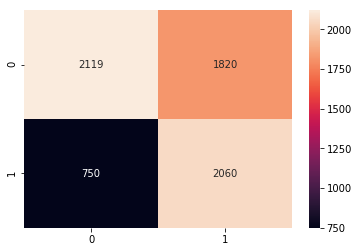

In [47]:
sns.heatmap(cm, annot = True, fmt = 'g')

In [48]:
accuracy_score(Y_test, Y_pred)

0.619202844865906

In [49]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.74      0.54      0.62      3939
          1       0.53      0.73      0.62      2810

avg / total       0.65      0.62      0.62      6749



## Appling the RandomForest

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
Y_pred2 = classifier2.predict(X_test)

In [52]:
accuracy_score(Y_test, Y_pred2)

0.6712105497110683

In [53]:
cm2 = confusion_matrix(Y_test, Y_pred2)

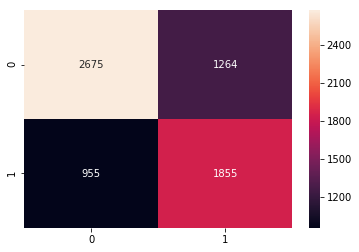

In [54]:
sns.heatmap(cm2, annot = True, fmt = 'g')

In [55]:
print(classification_report(Y_test, Y_pred2))

             precision    recall  f1-score   support

          0       0.74      0.68      0.71      3939
          1       0.59      0.66      0.63      2810

avg / total       0.68      0.67      0.67      6749



## Applying the K fold Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score
#k fold to the Logistic regrression model
accuracies = cross_val_score(estimator = classifier, X=X_train, y = Y_train, cv = 10)

In [57]:
accuracies.mean()

0.6355826945173295

In [58]:
from sklearn.model_selection import cross_val_score
#k fold cross validation to the Random forest model
accuracies2 = cross_val_score(estimator = classifier2, X=X_train, y = Y_train, cv = 10)

In [59]:
accuracies2.mean()

0.7369084163651227

In [60]:
accuracies2.std() * 2

0.02323225961094764

## Applying the Feature Selection

In [61]:
from sklearn.feature_selection import RFE

In [62]:
#Applying feature selecttion to the RandomForest model
rfe = RFE(classifier2, 20)
rfe = rfe.fit(X_train, Y_train)

In [63]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False,  True])

In [64]:
rfe.ranking_

array([ 1,  1,  1,  1,  1, 13,  1, 17, 21,  1, 20,  1,  1,  1,  1, 22, 16,
       15, 19,  1, 18,  1,  1, 12,  1,  1,  9, 11,  1,  5,  7,  1, 14,  6,
        3,  1, 10,  4,  8,  2,  1])

In [65]:
#taking only selected feature from the dataset
f = rfe.get_support(1)
Selected_feature_dataset = dataset[dataset.columns[f]]

In [66]:
Selected_feature_dataset.shape

(26996, 20)

In [67]:
Selected_feature_dataset

,churn,age,deposits,withdrawal,purchases_partners,cc_taken,cc_liked,app_downloaded,web_user,ios_user,android_user,rejected_loan,left_for_one_month,reward_rate,housing_O,housing_R,payment_type_Semi-Monthly,zodiac_sign_Aries,zodiac_sign_Leo,zodiac_sign_Taurus
0,0,37.0,0,0,0,0,0,1,1,1,0,0,0,0.00,0,0,0,0,1,0
1,0,28.0,0,0,1,0,0,1,1,1,0,0,0,1.47,0,1,0,0,1,0
2,0,35.0,47,2,86,0,0,1,0,0,1,0,0,2.17,0,1,1,0,0,0
3,0,26.0,26,3,38,0,0,1,0,0,1,0,0,1.10,0,1,0,0,0,0
4,1,27.0,0,0,2,0,0,1,1,0,1,0,0,0.03,0,0,0,1,0,0
5,1,32.0,5,3,111,0,0,1,1,0,1,0,0,1.83,0,1,0,0,0,1
6,0,21.0,0,0,4,0,0,1,0,0,1,0,0,0.07,0,0,0,0,0,0
7,0,24.0,0,0,2,0,0,1,0,0,1,0,0,0.11,0,0,0,0,1,0
8,0,28.0,0,0,0,2,0,1,1,1,0,0,0,0.87,0,1,0,0,0,0
9,0,23.0,1,0,87,0,0,1,1,1,0,0,0,1.07,0,0,0,0,0,0


#### Analyse the correlation of feature selected dataset

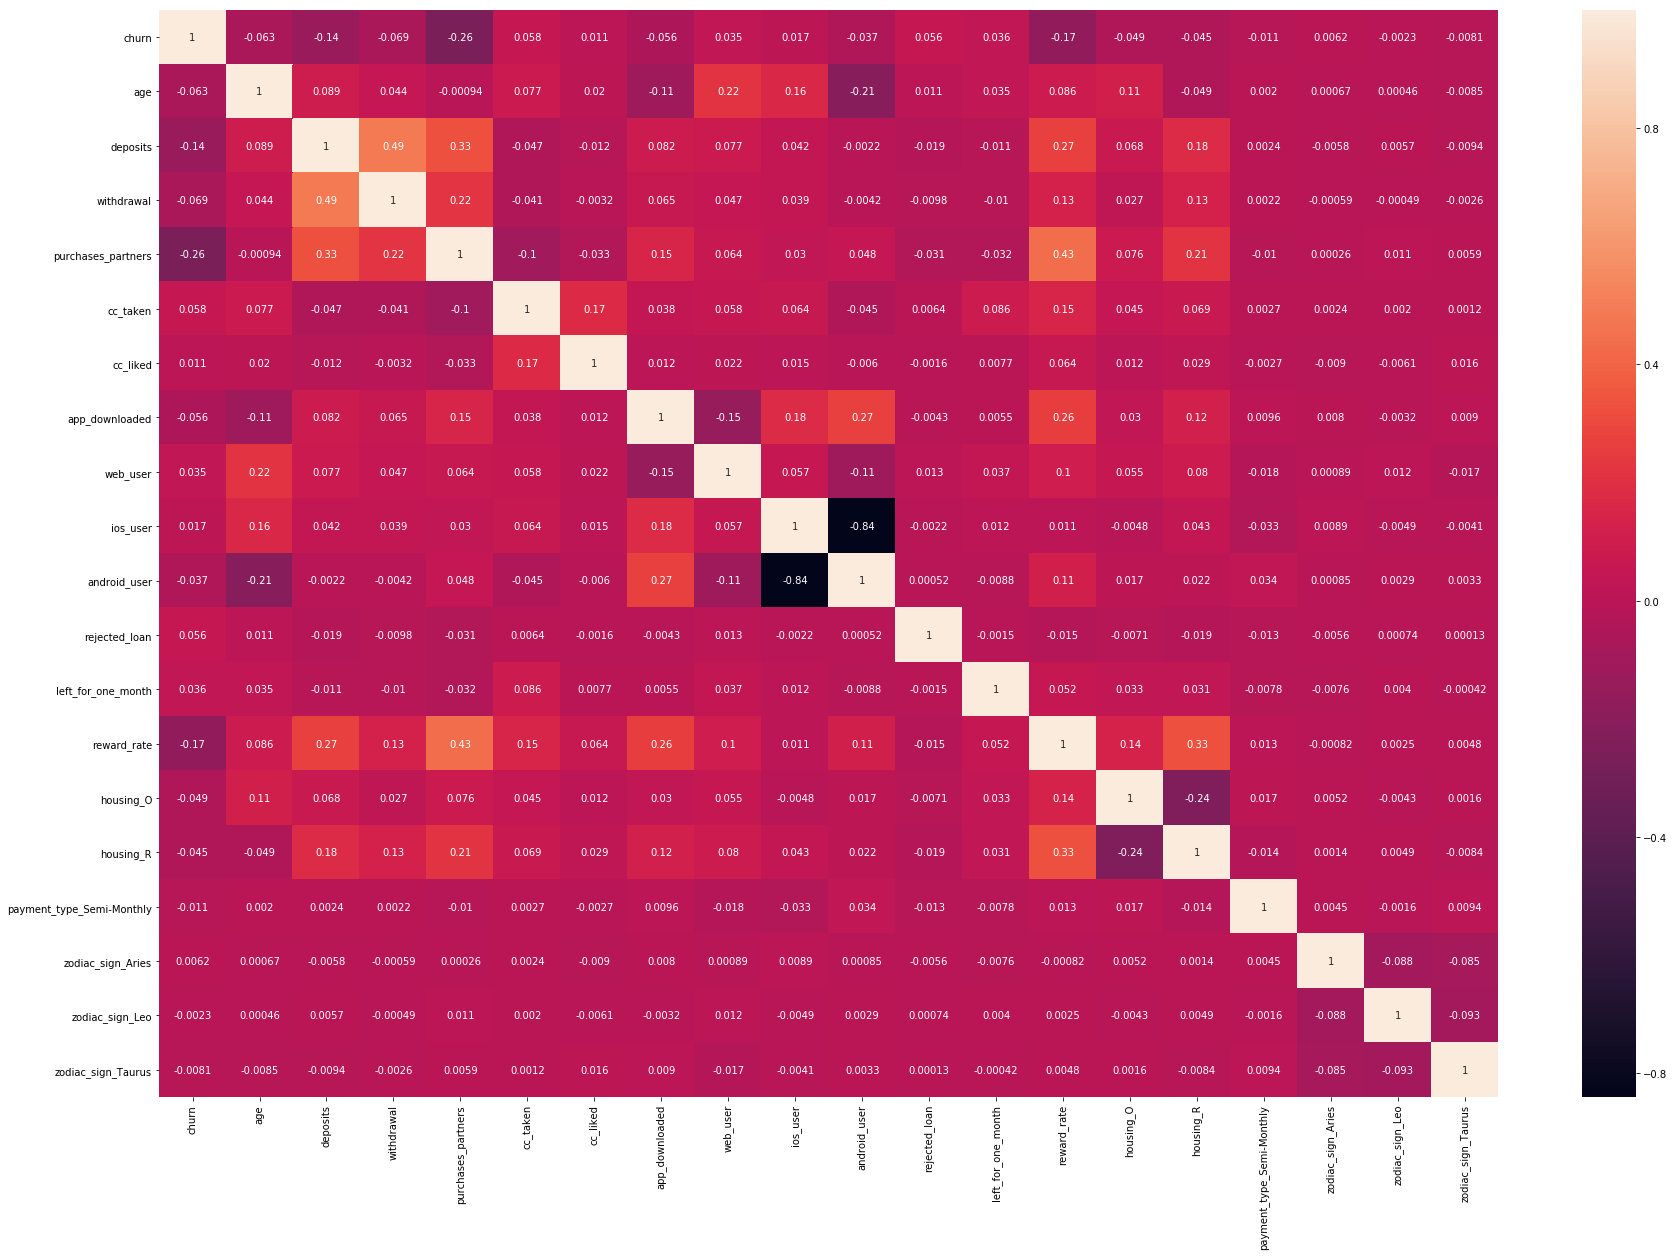

In [68]:
plt.figure(figsize = (30, 20))
sns.heatmap(Selected_feature_dataset.corr() , annot = True)

In [69]:
YY = dataset['churn']
Selected_feature_dataset = Selected_feature_dataset.drop(columns=['churn'])

### Spliting the Feature selected dataset

In [70]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(Selected_feature_dataset, YY, test_size = 0.25, random_state = 12345)

#### Applying RandomForest to the feature selected Dataset

In [71]:
classifier2.fit(X_train2, Y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [72]:
Y_pred_feature_selection = classifier2.predict(X_test2)

In [73]:
Y_pred_feature_selection

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
cm = confusion_matrix(Y_test2, Y_pred_feature_selection)

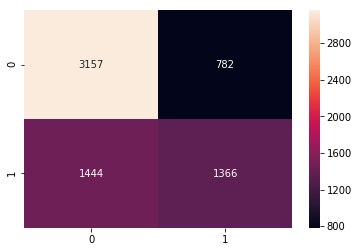

In [75]:
sns.heatmap(cm, annot = True, fmt = 'g')

In [76]:
print(classification_report(Y_test2, Y_pred_feature_selection))

             precision    recall  f1-score   support

          0       0.69      0.80      0.74      3939
          1       0.64      0.49      0.55      2810

avg / total       0.67      0.67      0.66      6749



In [77]:
accuracies_feature_selection = cross_val_score(estimator = classifier2,
                             X = X_train2,
                             y = Y_train2, cv = 10)

In [78]:
accuracies_feature_selection.mean()

0.6651367774246366

In [79]:
final_results = pd.concat([Y_test, user_id], axis = 1).dropna()
final_results['predicted_churn'] = Y_pred_feature_selection
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [80]:
final_results

,user,churn,predicted_churn
0,3120,1.0,0
1,21269,0.0,0
2,20839,0.0,0
3,24387,0.0,1
4,69531,0.0,0
5,25997,0.0,0
6,57608,1.0,0
7,16514,0.0,0
8,49320,1.0,0
9,46727,0.0,1


### on Random forest we get the accuracy of 67%

### while mean accuracy of Random Forest is 74%

#### we can also achive 67% accuracy on Logistic regession by feature selsection